In [1]:
import xarray as xr
import numpy as np
import matplotlib.cm as cm
import matplotlib.pylab as plt
import os
import time

/home/paula/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/paula/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [6]:

print(runs[348:])

['/home/paula/Documentos/Memoria/HySea/UTFSM-IniciacionTsunami-20200505T151943Z-001/UTFSM-IniciacionTsunami/ejemplo_chile/Escenarios_corridos/Escenarios/resul_series_sce400/000348/level01_ts.nc', '/home/paula/Documentos/Memoria/HySea/UTFSM-IniciacionTsunami-20200505T151943Z-001/UTFSM-IniciacionTsunami/ejemplo_chile/Escenarios_corridos/Escenarios/resul_series_sce400/000349/level01_ts.nc']


# Generando lista de archivos a correr
### El número de item en runs[] coincide con el número de escenario 

In [2]:
start_time = time.time()
ruta = '/home/paula/Documentos/Memoria/HySea/UTFSM-IniciacionTsunami-20200505T151943Z-001/UTFSM-IniciacionTsunami/ejemplo_chile/Escenarios_corridos/'#os.getcwd()+'/'

runs  = [] 
boyas_coquimbo = range(39)   # cantidad boyas en tierra o pegada a costa según zona de interés
boyas_valpo = range(65,104)


carpeta='Escenarios/resul_series_sce400/'

for i in range(350):
    if np.any(i <  int(10)) and np.any(i>=0):
        fold_escenario='00000'+str(i)+'/'
    if np.any(i < int(100)) and np.any(i >= int(10)):
        fold_escenario='0000'+str(i)+'/'
    if np.any(i >= int(100)):
        fold_escenario='000'+str(i)+'/'
    fold_eta='eta'

    fold_mom_x='mom_x'
    fold_mom_y='mom_y'

    runs.append(ruta+carpeta+fold_escenario+'level01_ts.nc')

#Como archivo no está en misma ruta de directorio en que lo guardo, me crea las carpetas en otro directorio.
#Buscar comando que las cree en la ruta que quiero

   # if not os.path.isdir(carpeta+fold_escenario+fold_eta): # crea folder si no existe
   #     os.makedirs(carpeta+fold_escenario+fold_eta)

   # if not os.path.isdir(carpeta+fold_escenario+fold_mom_x): # crea folder si no existe
   #     os.makedirs(carpeta+fold_escenario+fold_mom_x)
   # if not os.path.isdir(carpeta+fold_escenario+fold_mom_y): # crea folder si no existe
   #     os.makedirs(carpeta+fold_escenario+fold_mom_y)

print("--- %s seconds ---" % (time.time() - start_time))


--- 0.0068628787994384766 seconds ---


# Cargo los mapas de coquimbo y valpo 
### Esto para luego poder graficarlos junto a las series de tiempo en una misma imagen, mostrando la boya a la que se refiere.

In [3]:
mod  = ['bat_l4_serecoq_escenario4','bat_l4_vinavalpo_escenario4']
bases = {}
for m in mod:
    base = xr.open_dataset(ruta+m+'.grd')
    bases[m]=base

In [4]:
base_coq = bases['bat_l4_serecoq_escenario4']
base_valpo = bases['bat_l4_vinavalpo_escenario4']
lon_coq = base_coq.variables['x'][:].data
lat_coq = base_coq.variables['y'][:].data
grd_coq = base_coq.variables['z'][:].data

lon_valpo = base_valpo.variables['x'][:].data
lat_valpo = base_valpo.variables['y'][:].data
grd_valpo = base_valpo.variables['z'][:].data

c_agua = plt.cm.Blues_r(np.linspace(0,0.5,128))
c_terr = plt.cm.copper(np.linspace(0.25,0.75,128))
cols   = np.vstack((c_agua, c_terr))
cmap   = cm.colors.LinearSegmentedColormap.from_list("q", cols)

# Serie de tiempo de altura de inundación - Coquimbo

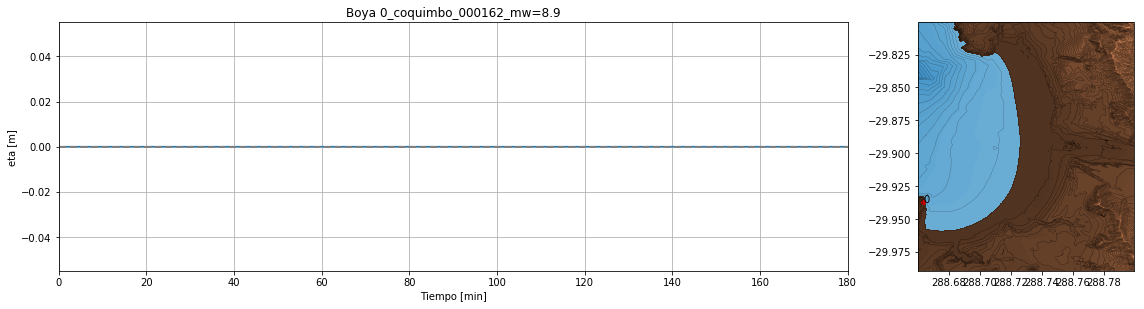

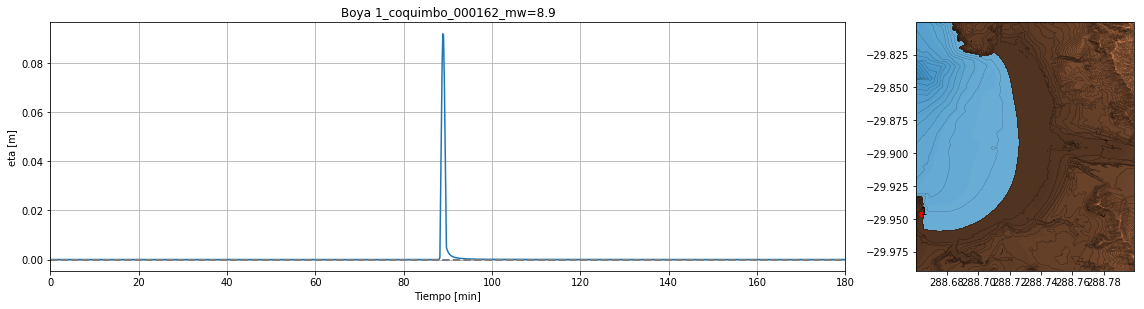

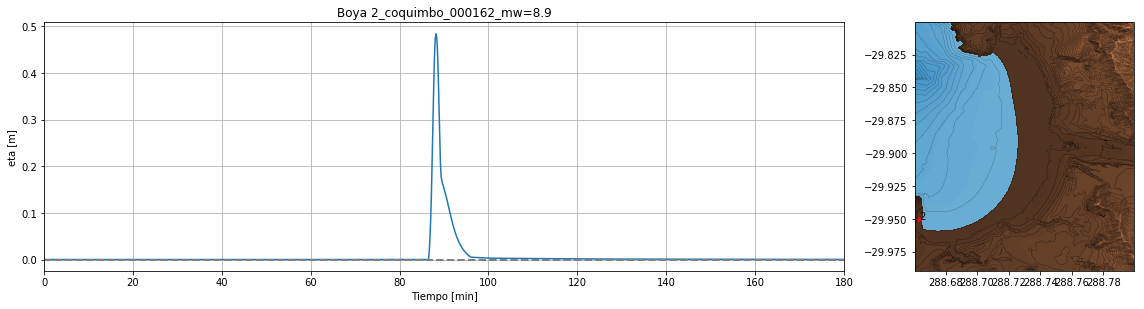

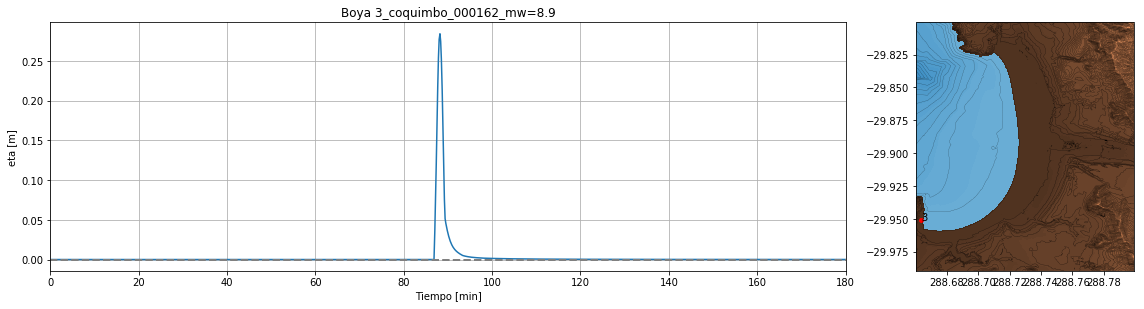

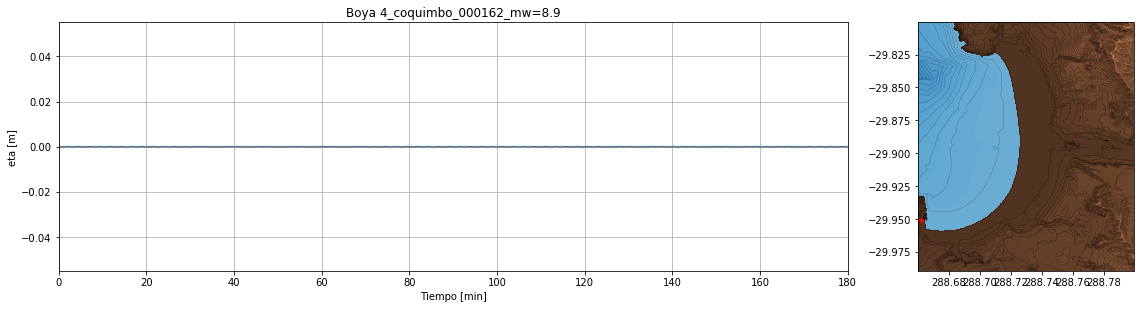

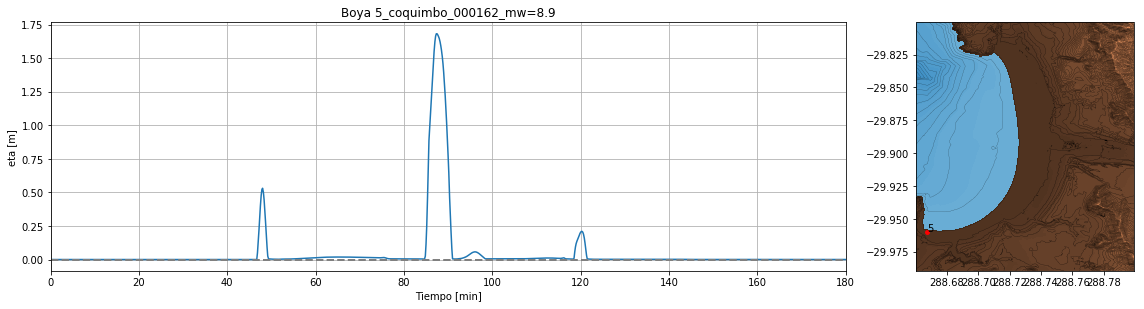

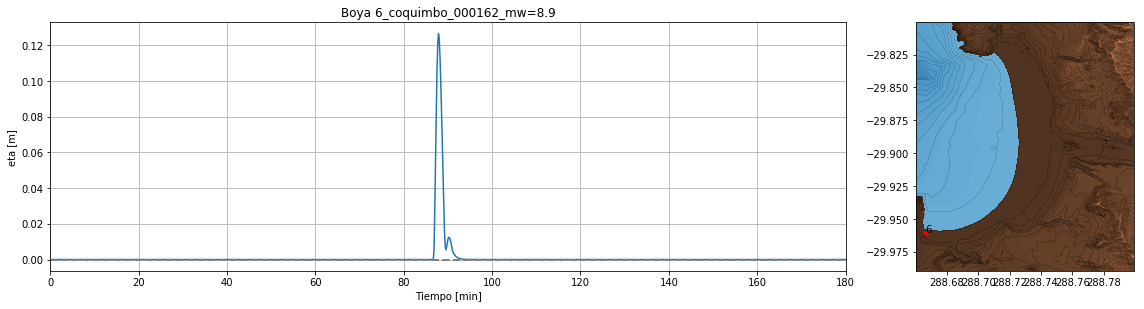

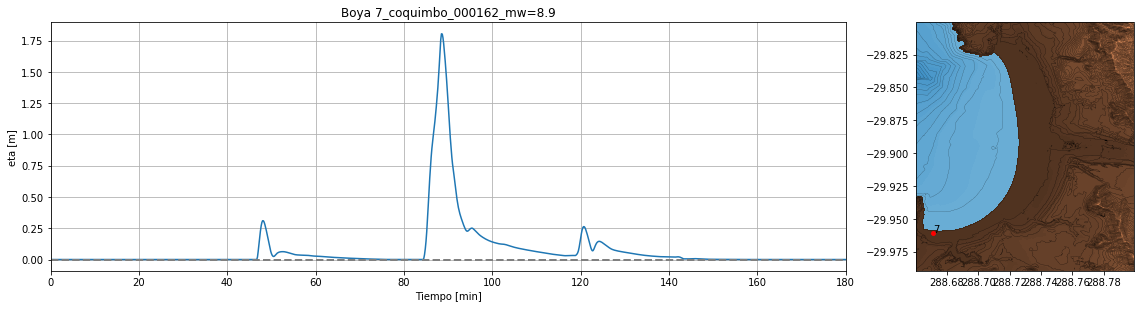

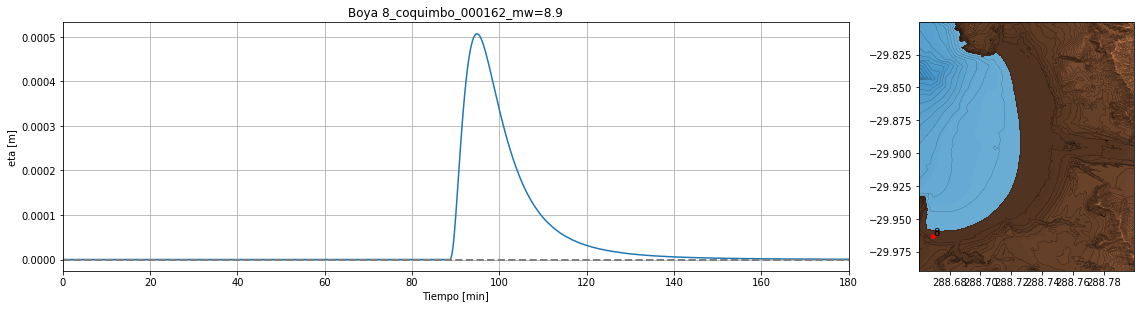

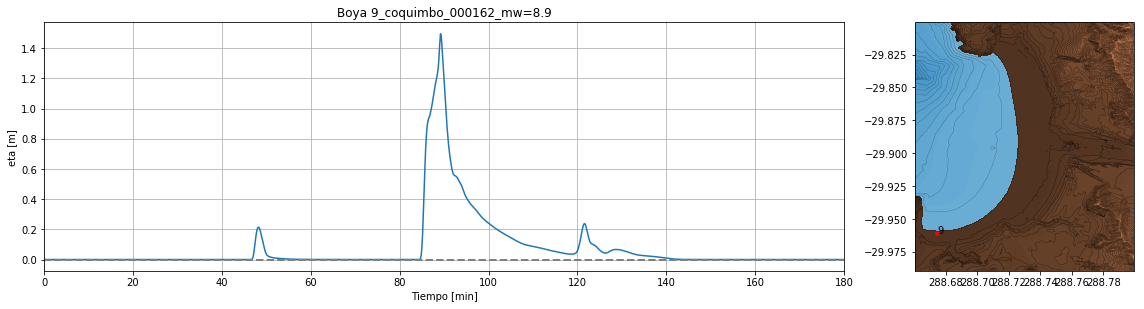

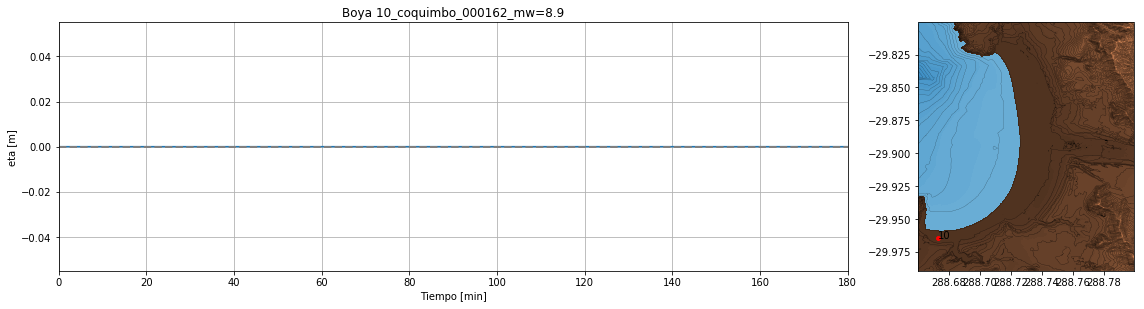

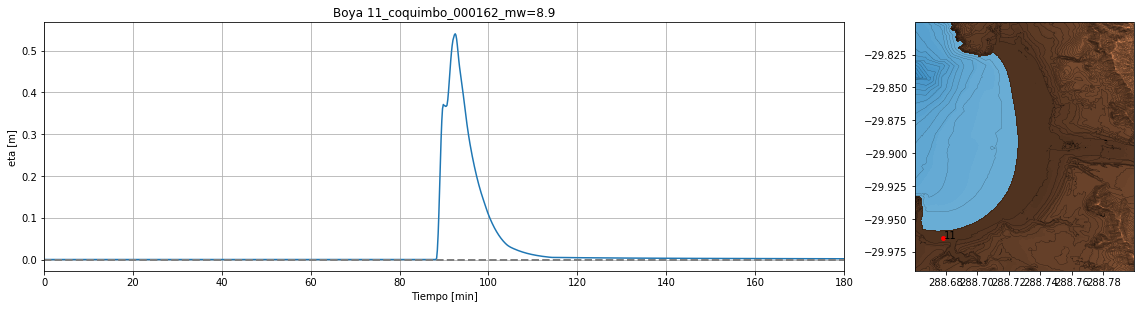

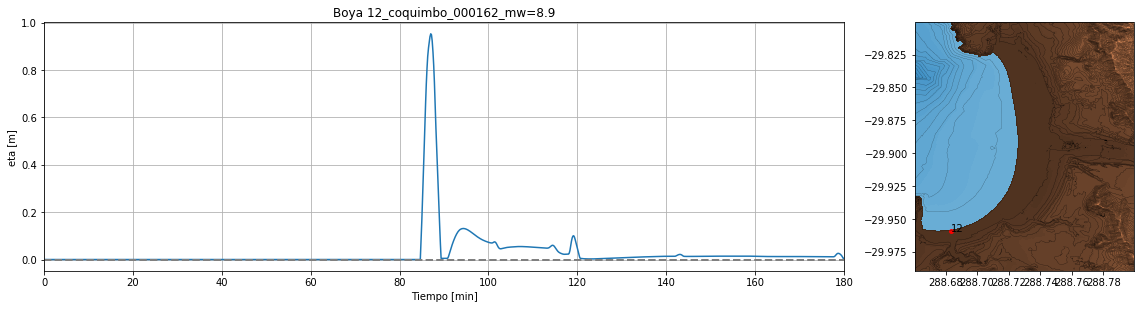

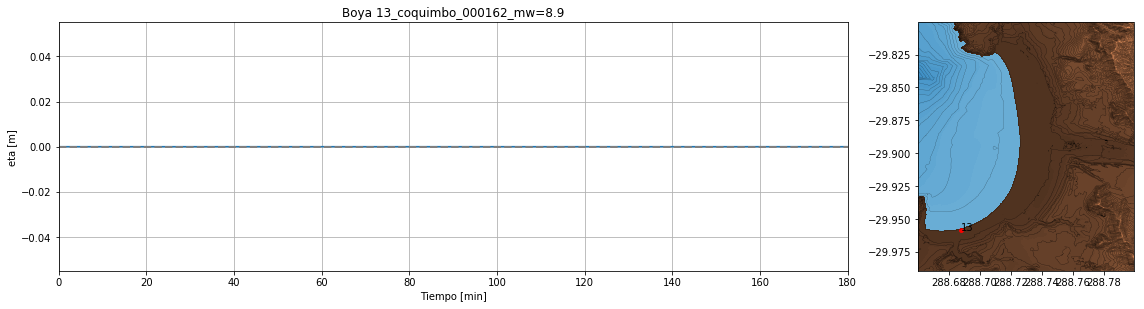

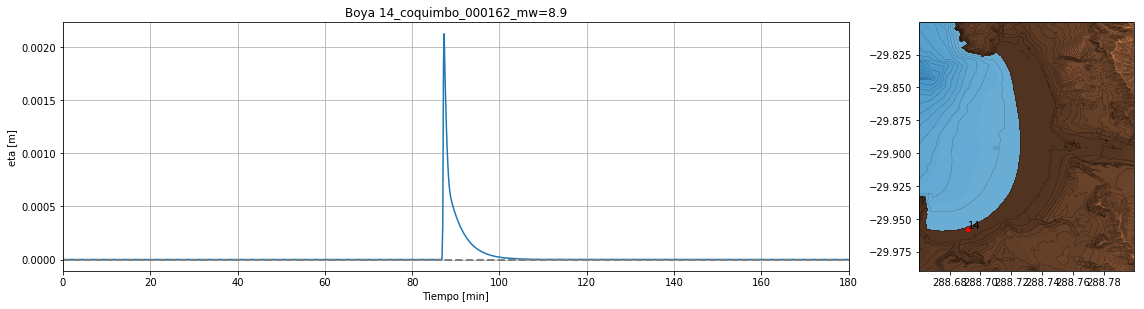

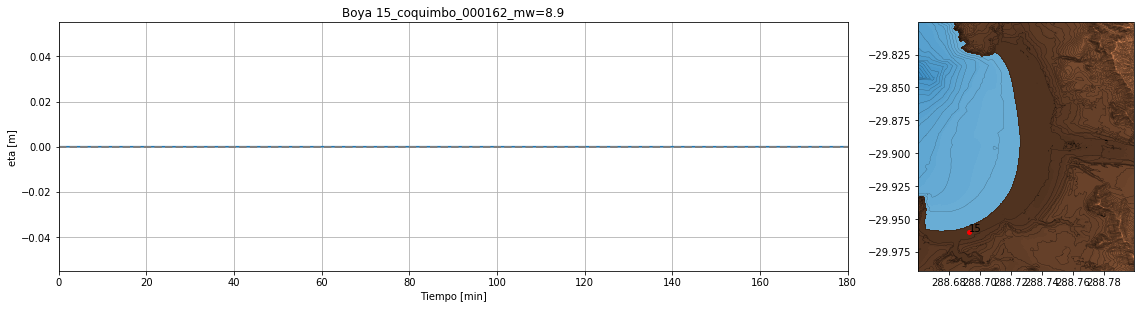

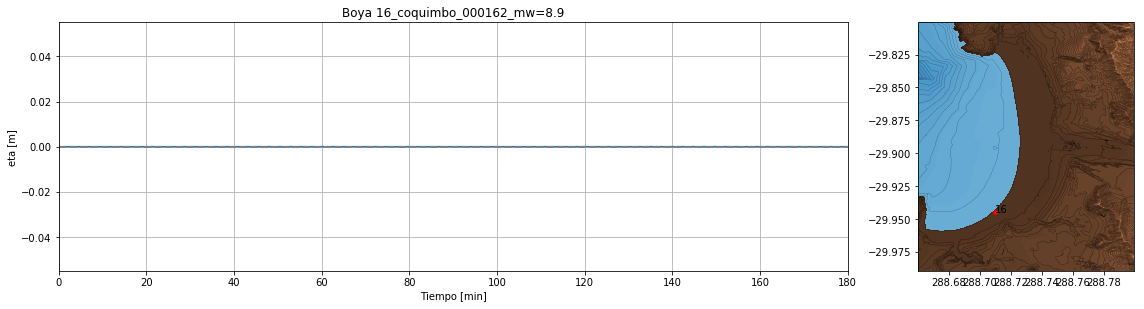

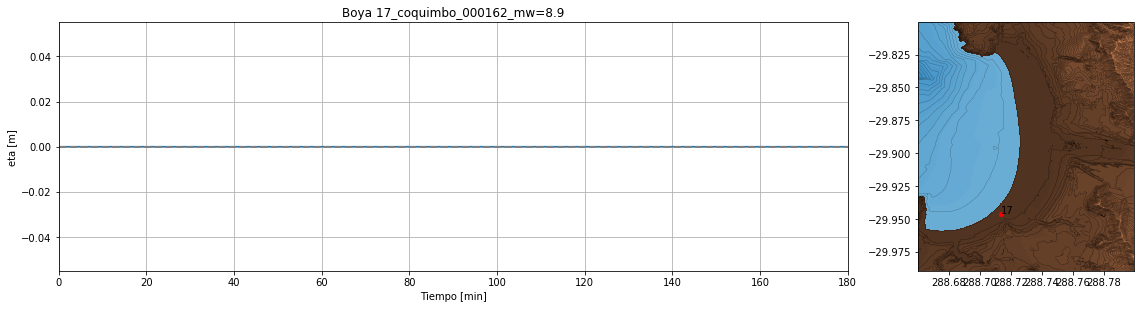

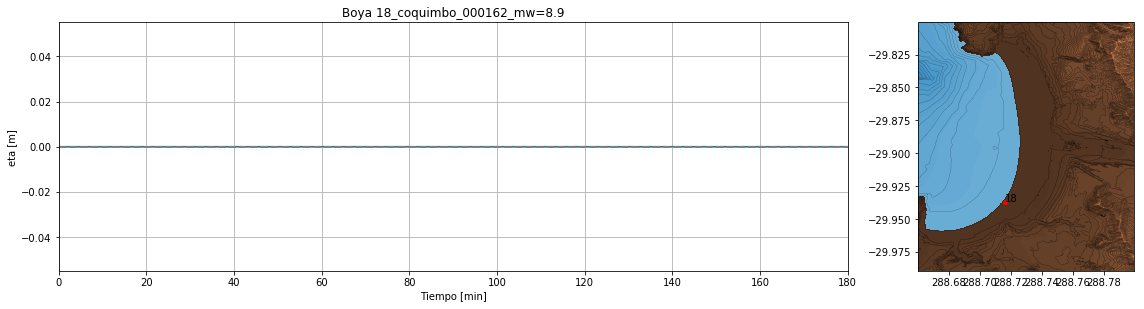

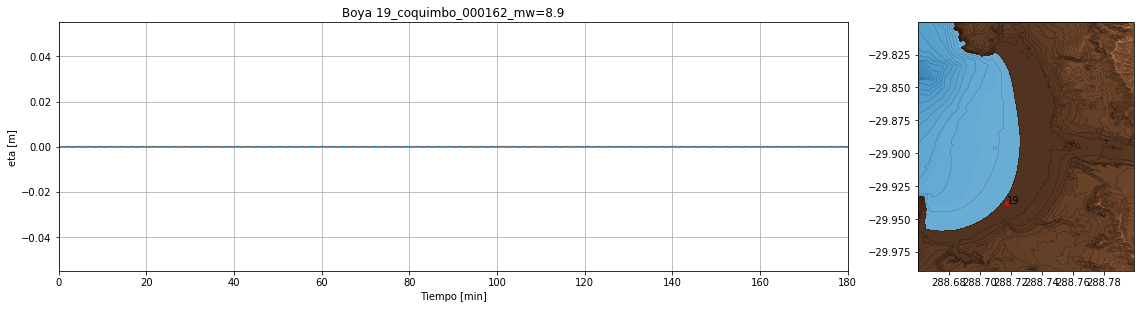

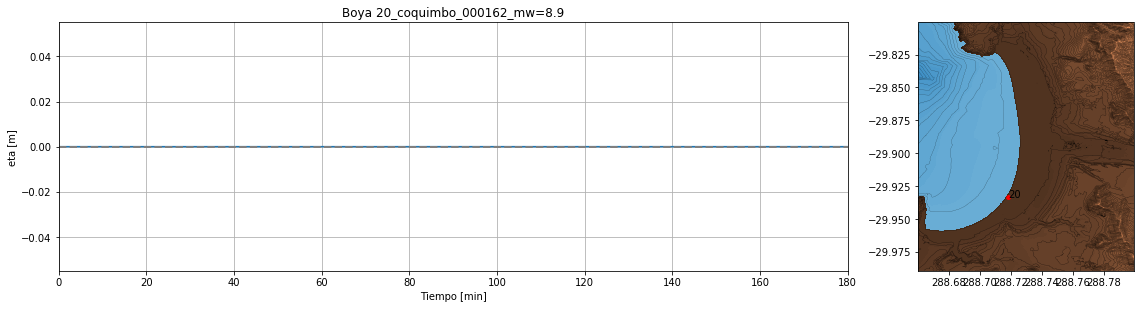

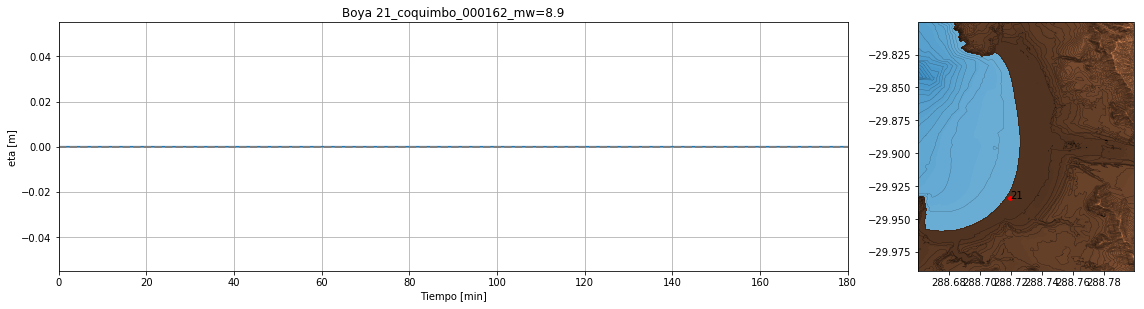

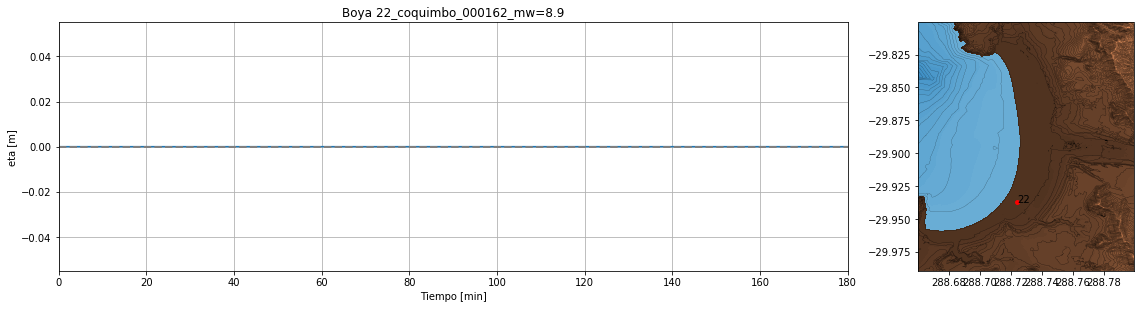

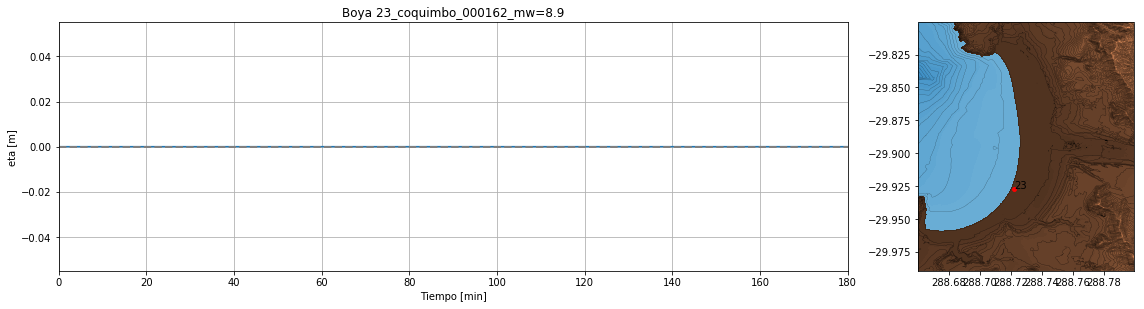

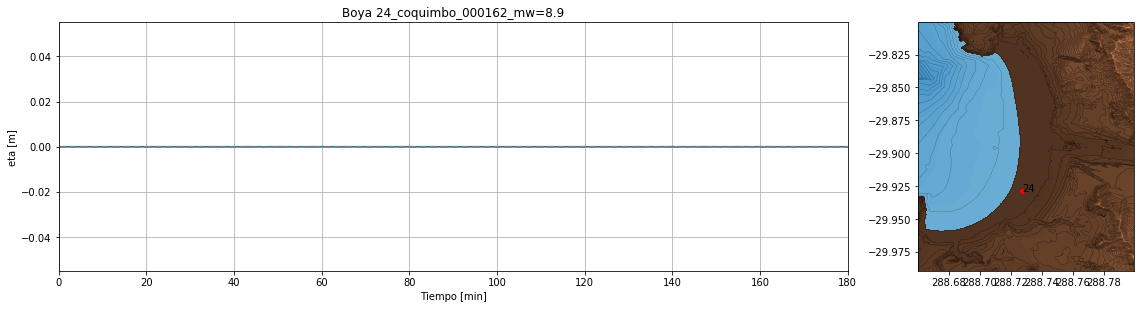

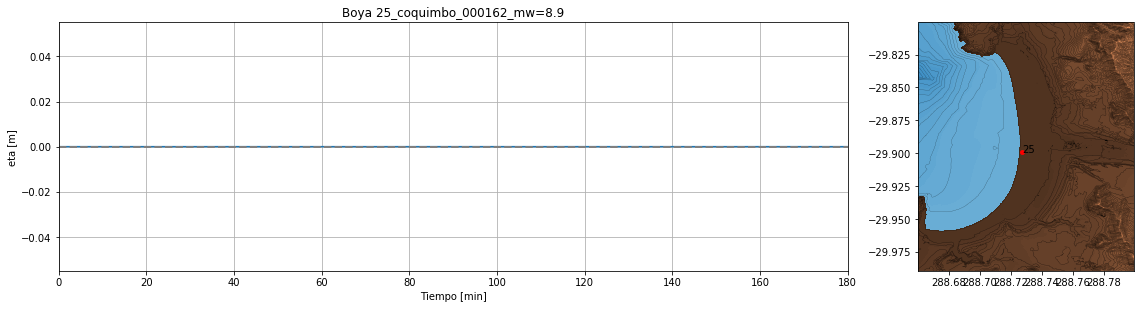

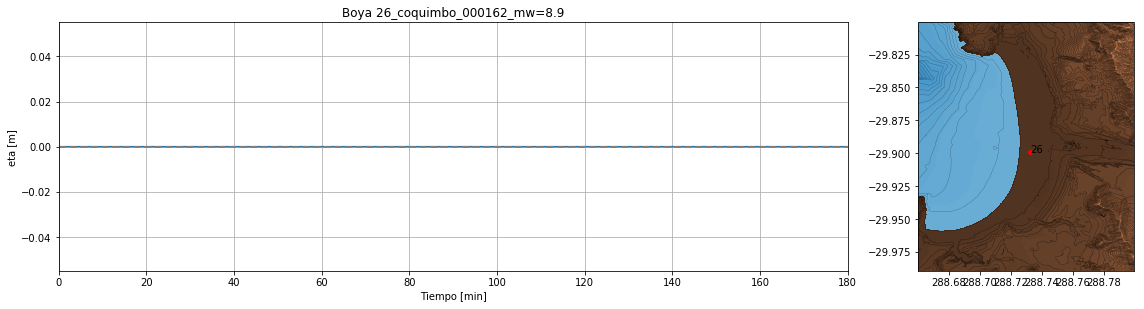

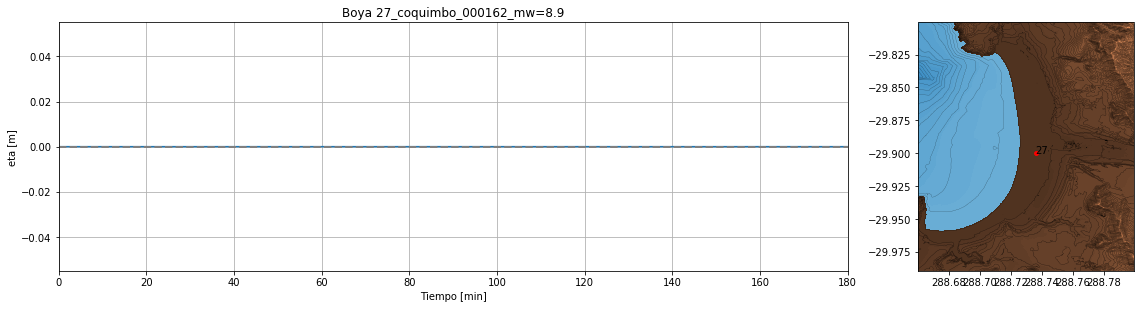

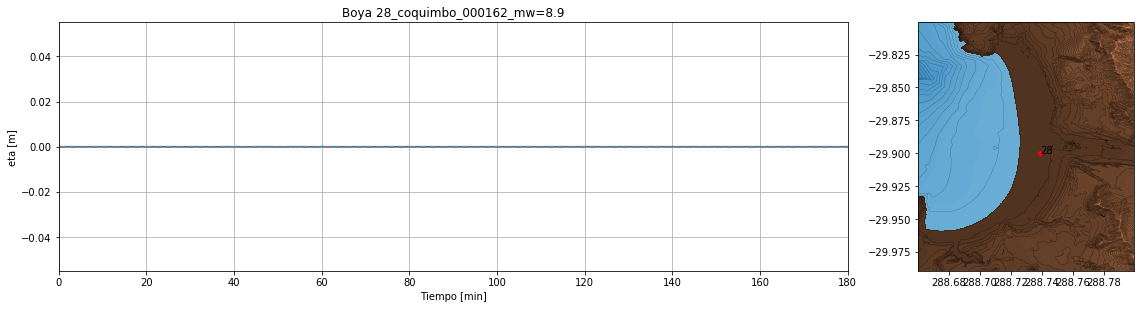

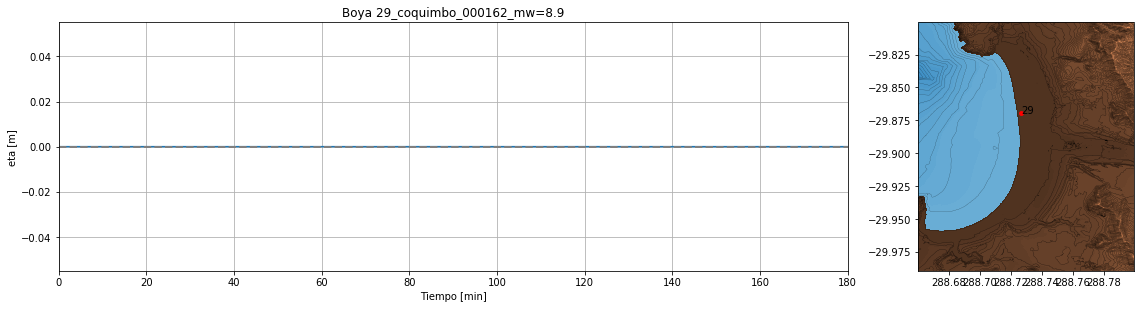

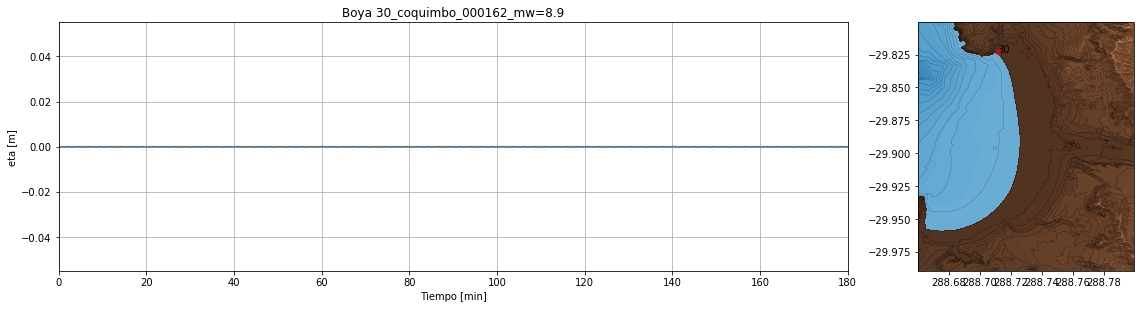

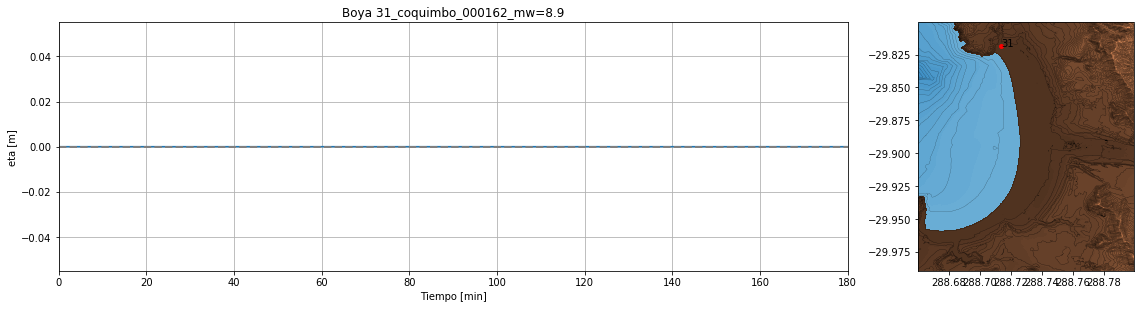

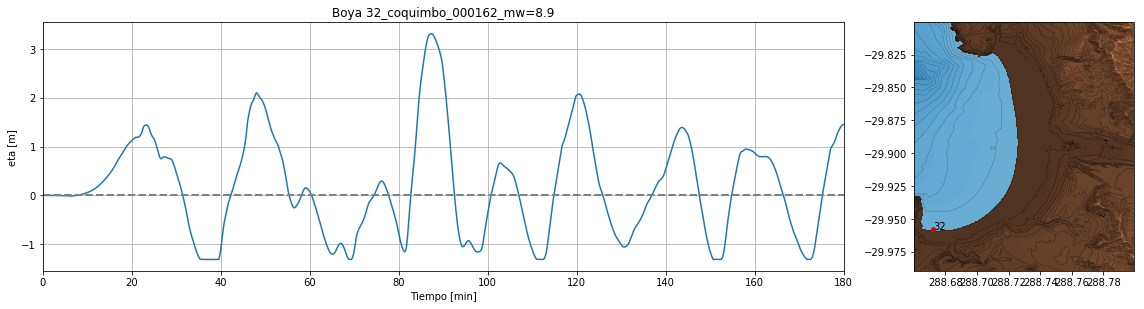

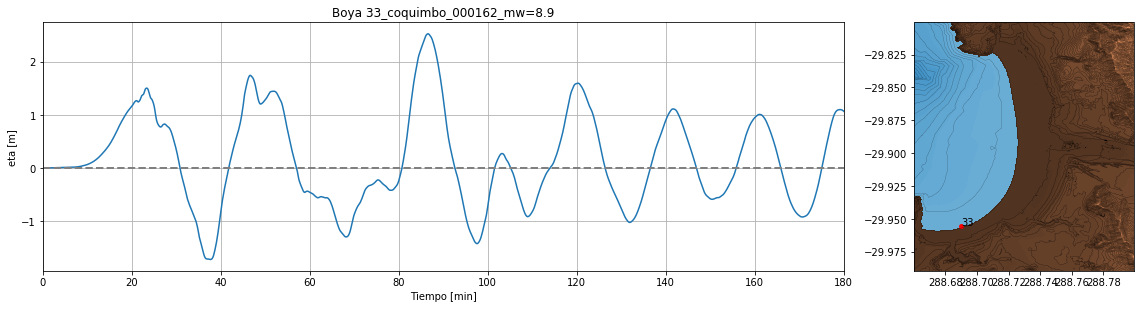

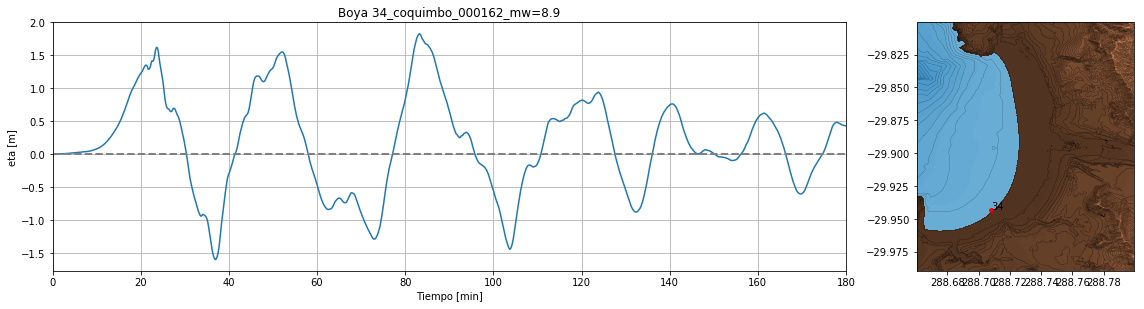

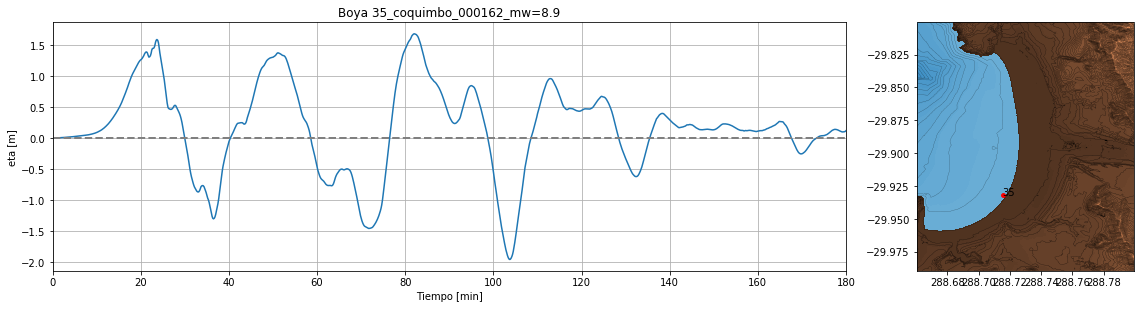

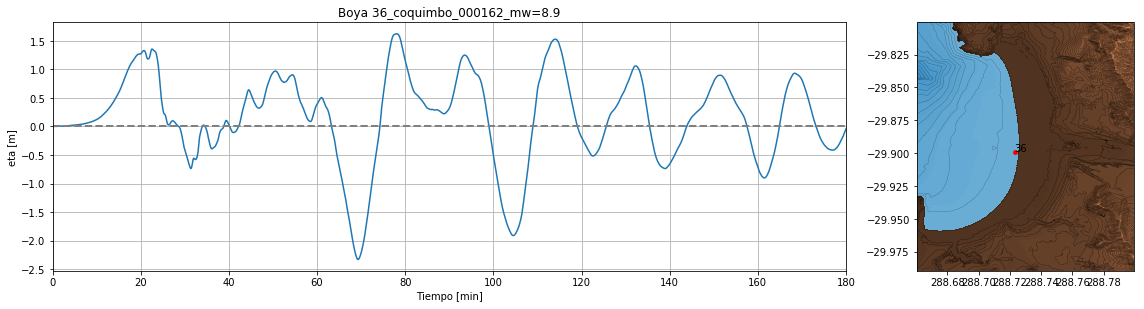

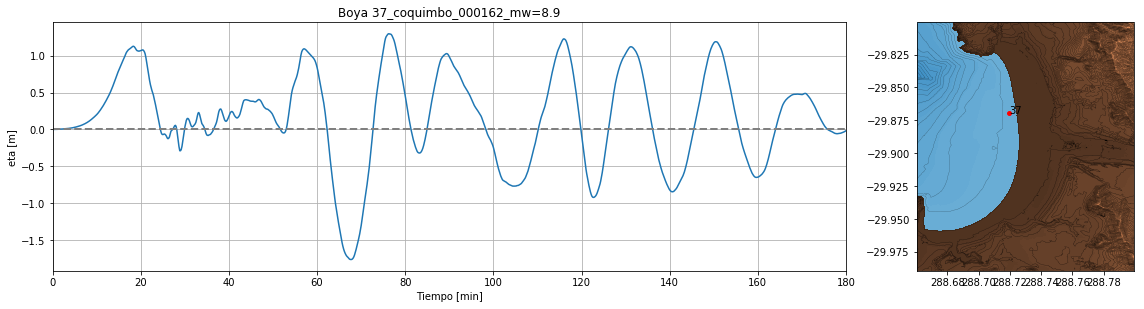

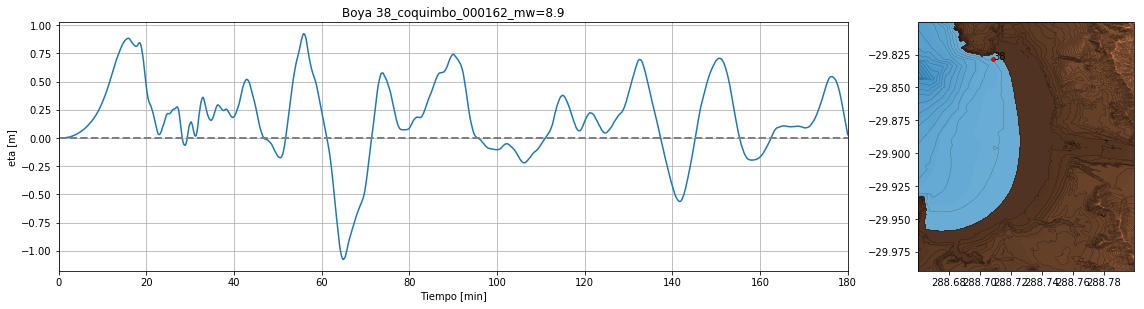

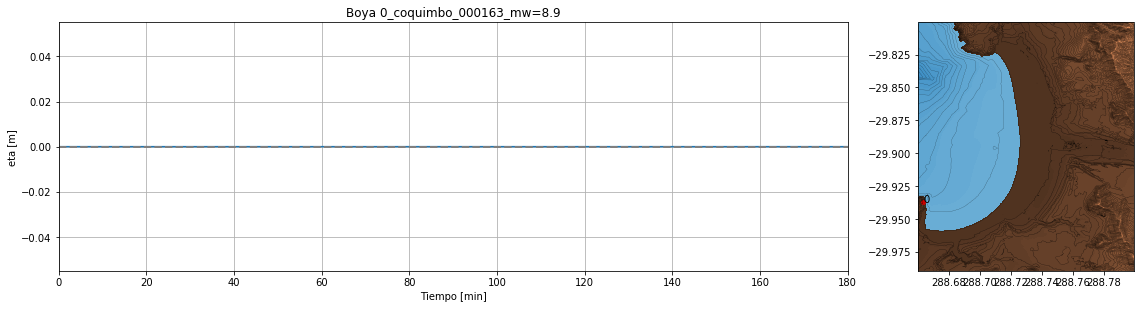

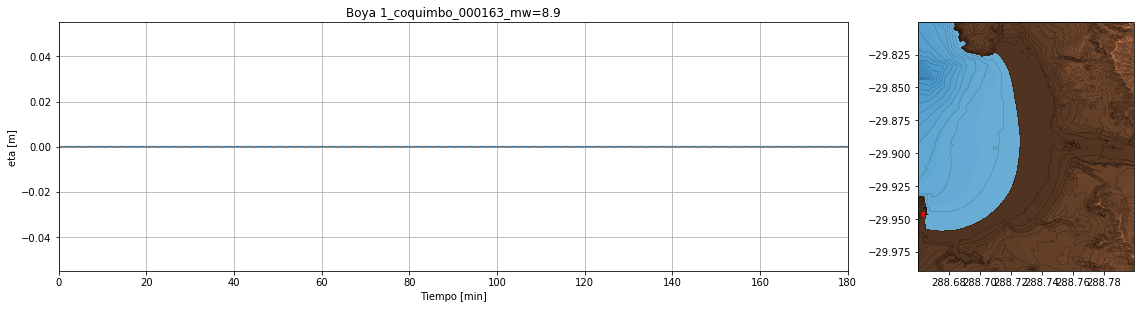

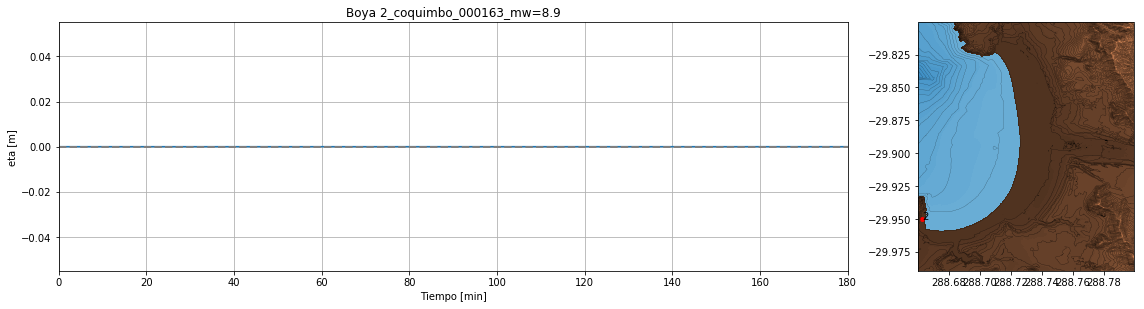

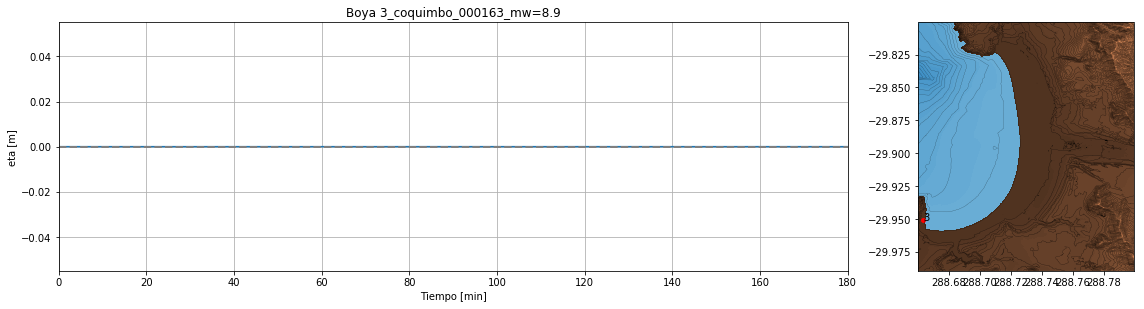

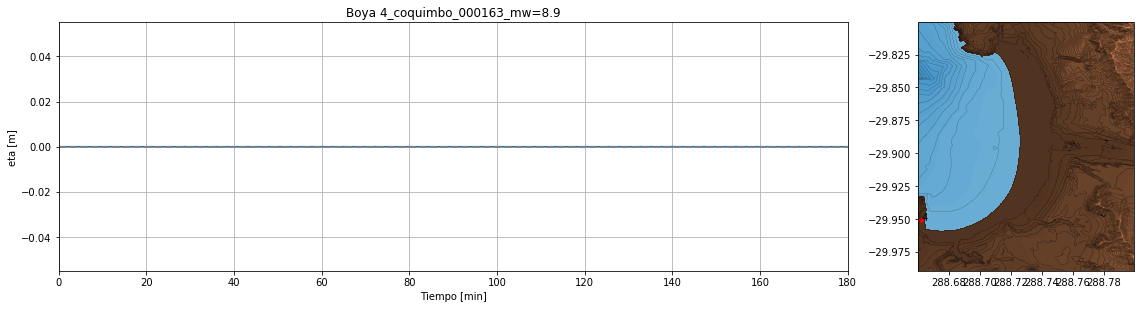

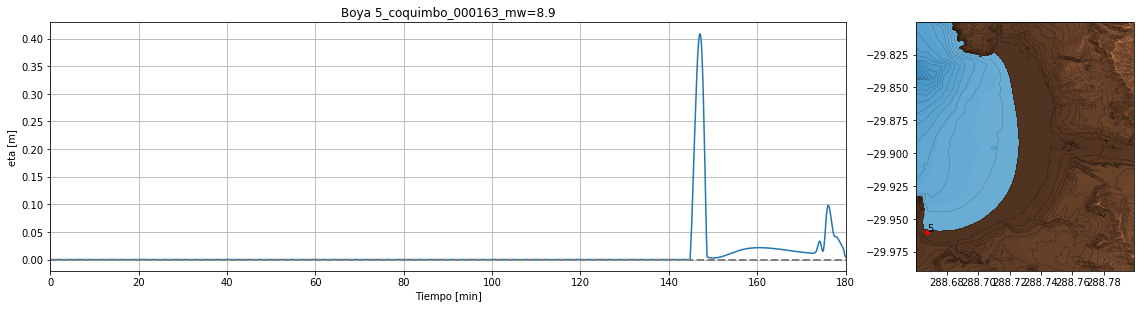

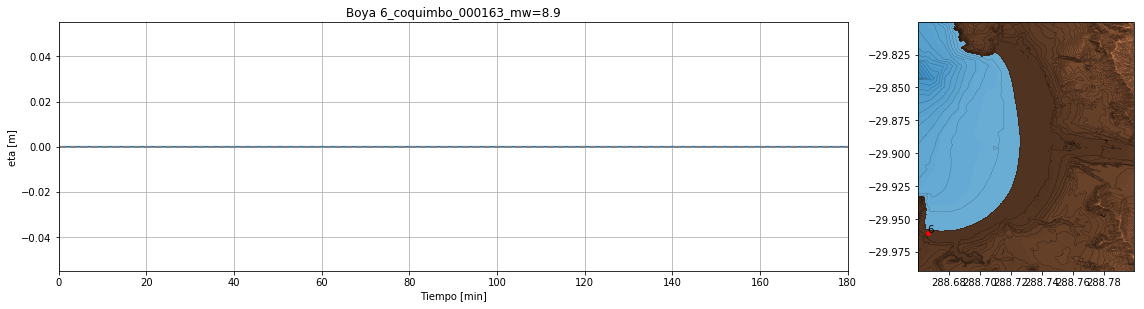

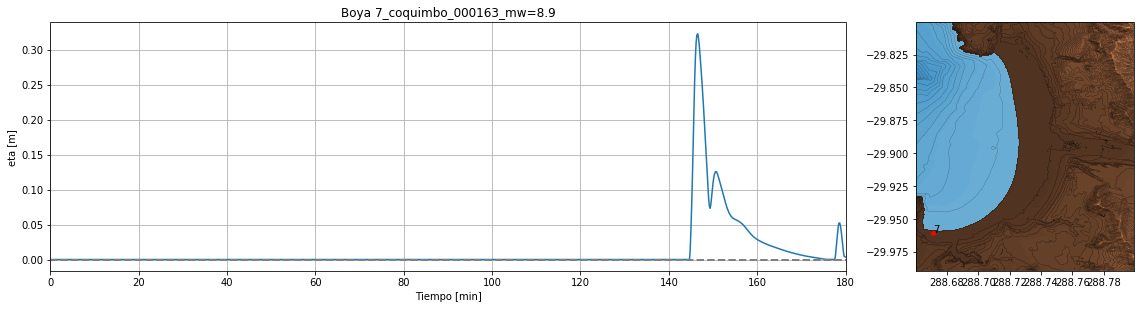

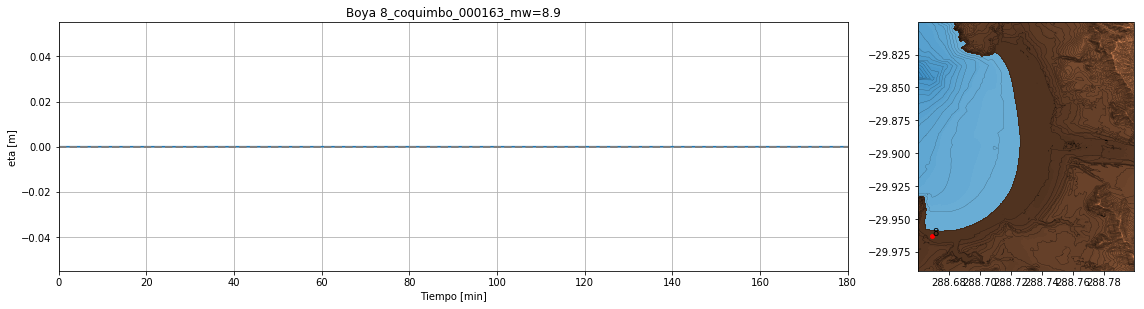

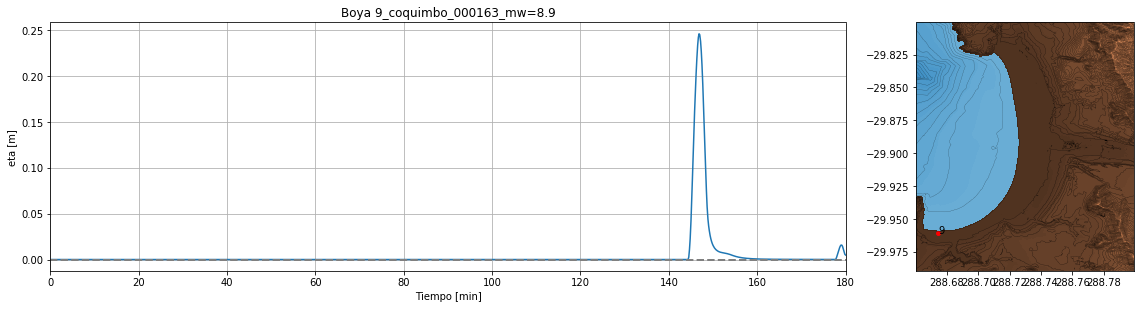

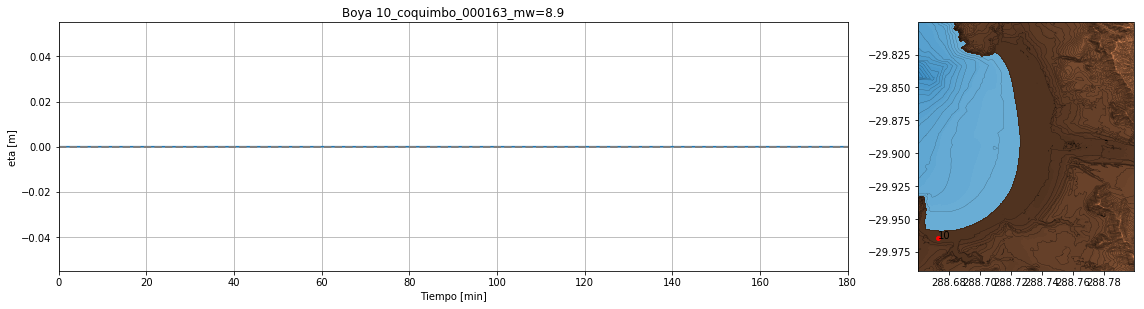

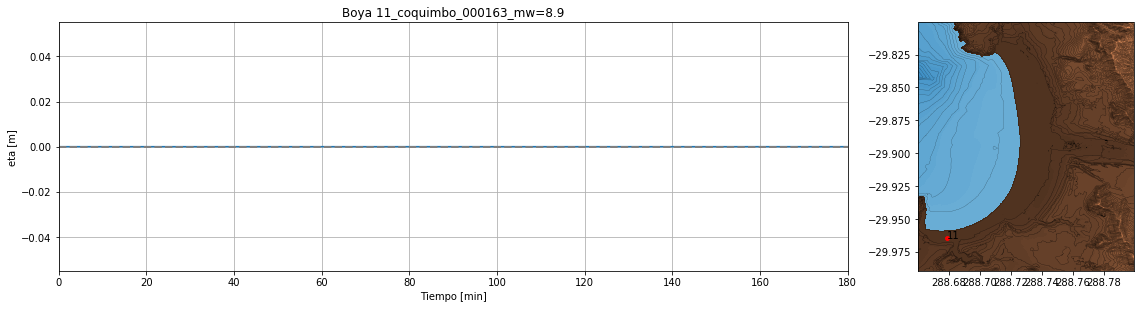

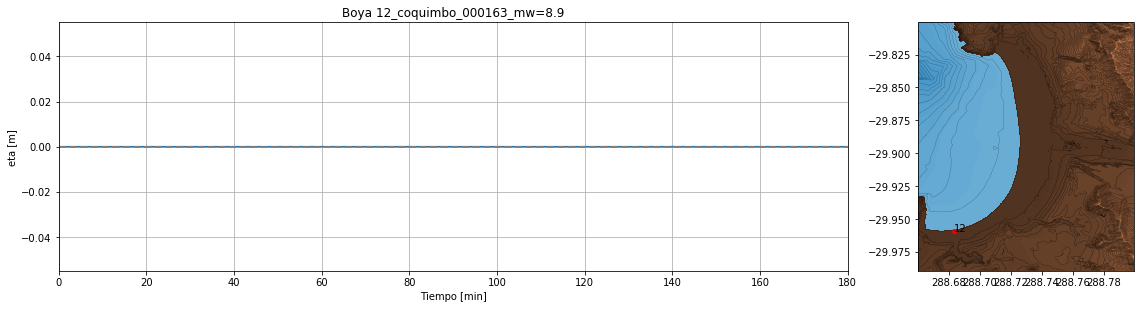

In [ ]:
#eta Coquimbo
start_time = time.time()

x = np.linspace(0, 180, 100)
y = np.zeros(100)

for j in runs[162:]:
    if np.any(int(j.split('/')[-2])< int(50)):
        mw='mw=8.6'
    if np.any(int(j.split('/')[-2])<int(100)) and np.any(int(j.split('/')[-2]) >= int(50)):
        mw='mw=8.7'
    if np.any(int(j.split('/')[-2])<int(150)) and np.any(int(j.split('/')[-2]) >= int(100)):
        mw='mw=8.8'
    if np.any(int(j.split('/')[-2])<int(200)) and np.any(int(j.split('/')[-2]) >= int(150)):
        mw='mw=8.9'
    if np.any(int(j.split('/')[-2])<int(250)) and np.any(int(j.split('/')[-2]) >= int(200)):
        mw='mw=9.0'
    if np.any(int(j.split('/')[-2])<int(300)) and np.any(int(j.split('/')[-2]) >= int(250)):
        mw='mw=9.1'
    if np.any(int(j.split('/')[-2])<int(350)) and np.any(int(j.split('/')[-2]) >= int(300)):
        mw='mw=9.2'
            
    base = xr.open_dataset(j)
        
    lon  = base.variables['longitude'][:].data
    lat  = base.variables['latitude'][:].data
        
    eta  = base.variables['eta'][:].data
    times = base.variables['time'][:].data
    time_i = np.zeros(times.shape[0])
    for k in range(0,times.shape[0]):
        texto2 = str(times[k]).split(':')
        texto1 = texto2[0].split('T')
        seg = float(texto2[2])
        mnt = float(texto2[1])
        hrs = float(texto1[1])
        time_i[k]=hrs*60+mnt+seg/60

    for i in boyas_coquimbo:
        fig = plt.figure(figsize=(16, 8))
        
        a1 = plt.subplot2grid((8,4),(0,0),rowspan=4,colspan = 3)
        a2 = plt.subplot2grid((8,4),(0,3), rowspan = 4, colspan =4)
          
        
          
        a1.plot(time_i, eta[:,i]-eta[:,i][0]) 
        
            
        a1.plot(x, y, color='grey',linewidth=2, linestyle='dashed')
        a1.set_xlim((0,180))
    
        a1.set_title('Boya '+str(i)+'_coquimbo_'+j.split('/')[-2]+'_'+mw)
        a1.set_xlabel('Tiempo [min]')
        a1.set_ylabel('eta [m]')
        a1.grid(True)
        
        a2.contour(lon_coq,lat_coq,grd_coq, 80, linewidths=0.2, colors='k')
        a2.contourf(lon_coq,lat_coq,grd_coq, 50,cmap=cmap,
                        vmax=abs(grd_coq).max(), vmin=-abs(grd_coq).max(),zorder =1)
       
        a2.scatter(lon[i], lat[i], s=15, color='red')
        a2.annotate(str(i), (lon[i], lat[i]))
        
        plt.tight_layout()
        plt.show()
        
        fig.savefig(ruta+carpeta+j.split('/')[-2]+'/'+fold_eta+'/'+'Coquimbo_eta_Boya_'+str(i)+'_'+j.split('/')[-2]+'_'+mw + '.png', bbox_inches='tight', dpi=600)
        plt.cla()
        plt.close()
print("--- %s seconds ---" % (time.time() - start_time))


# Serie de tiempo de altura de inundación - Valpo

In [ ]:
#eta Valpo
start_time = time.time()

x = np.linspace(0, 180, 100)
y = np.zeros(100)

for j in runs:
    if np.any(int(j.split('/')[-2])< int(50)):
        mw='mw=8.6'
    if np.any(int(j.split('/')[-2])<int(100)) and np.any(int(j.split('/')[-2]) >= int(50)):
        mw='mw=8.7'
    if np.any(int(j.split('/')[-2])<int(150)) and np.any(int(j.split('/')[-2]) >= int(100)):
        mw='mw=8.8'
    if np.any(int(j.split('/')[-2])<int(200)) and np.any(int(j.split('/')[-2]) >= int(150)):
        mw='mw=8.9'
    if np.any(int(j.split('/')[-2])<int(250)) and np.any(int(j.split('/')[-2]) >= int(200)):
        mw='mw=9.0'
    if np.any(int(j.split('/')[-2])<int(300)) and np.any(int(j.split('/')[-2]) >= int(250)):
        mw='mw=9.1'
    if np.any(int(j.split('/')[-2])<int(350)) and np.any(int(j.split('/')[-2]) >= int(300)):
        mw='mw=9.2'
            
    base = xr.open_dataset(j)
        
    lon  = base.variables['longitude'][:].data
    lat  = base.variables['latitude'][:].data
        
    eta  = base.variables['eta'][:].data
    times = base.variables['time'][:].data
    time_i = np.zeros(times.shape[0])
    for k in range(0,times.shape[0]):
        texto2 = str(times[k]).split(':')
        texto1 = texto2[0].split('T')
        seg = float(texto2[2])
        mnt = float(texto2[1])
        hrs = float(texto1[1])
        time_i[k]=hrs*60+mnt+seg/60

    for i in boyas_valpo:
        fig = plt.figure(figsize=(16, 8))
        
        a1 = plt.subplot2grid((8,4),(0,0),rowspan=4,colspan = 3)
        a2 = plt.subplot2grid((8,4),(0,3), rowspan = 4, colspan =4)
           
        
          
        a1.plot(time_i, eta[:,i]-eta[:,i][0]) 
        
            
        a1.plot(x, y, color='grey',linewidth=2, linestyle='dashed')
        a1.set_xlim((0,180))
    
        a1.set_title('Boya '+str(i)+'_valpo_'+j.split('/')[-2]+'_'+mw)
        a1.set_xlabel('Tiempo [min]')
        a1.set_ylabel('eta [m]')
        a1.grid(True)
        
        a2.contour(lon_valpo,lat_valpo,grd_valpo, 80, linewidths=0.2, colors='k')
        a2.contourf(lon_valpo,lat_valpo,grd_valpo, 50,cmap=cmap,
                        vmax=abs(grd_valpo).max(), vmin=-abs(grd_valpo).max(),zorder =1)
        
        a2.scatter(lon[i], lat[i], s=15, color='red')
        a2.annotate(str(i), (lon[i], lat[i]))
        
        plt.tight_layout()
        plt.show()
        
        fig.savefig(ruta+carpeta+j.split('/')[-2]+'/'+fold_eta+'/'+'Valpo_eta_Boya_'+str(i)+'_'+j.split('/')[-2]+'_'+mw + '.png', bbox_inches='tight', dpi=600)
        plt.cla()
        plt.close()
        
print("--- %s seconds ---" % (time.time() - start_time))